# Toxic-Chat Dataset

## Description

This dataset come from LMSYS ORG (Large Model Systems Organization), an open research organization founded by students and faculty from UC Berkeley in collaboration with UCSD and CMU.

The "toxic-chat" dataset is a collection of online chat logs compiled and made available on the Hugging Face platform by [lmsys](https://huggingface.co/lmsys). This dataset is designed for training artificial intelligence models to detect and moderate toxic behavior in online interactions. The data include a variety of comments with annotations indicating the presence of toxic behaviors.

## Accessing the Dataset

To access the "toxic-chat" dataset, visit the following link: [Toxic-Chat Dataset on Hugging Face](https://huggingface.co/datasets/lmsys/toxic-chat).

## Dataset Contents

The dataset contains the following:

- **Chat Texts**: Comments and interactions between players in the context of online games.
- **Annotations**: Each message has been subject to two distinct classifications: the first, a conducted binary assessment, determines whether the content is toxic or not; the second, a multilabel classification specifies the exact nature of the message's toxicity. The half of the annations are conducted by human annotators, and the other half are conducted by an OpenAI model.

## Usage

This dataset is particularly useful for researchers and developers working on automatic content moderation solutions and online toxic behavior detection. It can be used to train machine learning models to identify and filter out harmful comments in online communities.

In [1]:
%load_ext autoreload 
%autoreload 2

In [14]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import sys
sys.path.append('..')

from constants import CATEGORIES
from preprocessing import load_dataframes

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eithannakache/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
(df_train, df_val, df_test) = load_dataframes()

In [16]:
df = pd.concat([df_train, df_val, df_test])

In [17]:
df.head()

id                                       comment_text  \
140030  ed56f082116dcbd0  Grandma Terri Should Burn in Trash \nGrandma T...   
159124  f8e3cd98b63bf401  , 9 May 2009 (UTC)\nIt would be easiest if you...   
60006   a09e1bcf10631f9a  "\n\nThe Objectivity of this Discussion is dou...   
65432   af0ee0066c607eb8              Shelly Shock\nShelly Shock is. . .( )   
154979  b734772b1a807e09  I do not care. Refer to Ong Teng Cheong talk p...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
140030      1             0        0       0       0              0  
159124      0             0        0       0       0              0  
60006       0             0        0       0       0              0  
65432       0             0        0       0       0              0  
154979      0             0        0       0       0              0

In [18]:
df.describe()

toxic   severe_toxic        obscene         threat  \
count  223549.000000  223549.000000  223549.000000  223549.000000   
mean        0.095657       0.008777       0.054306       0.003082   
std         0.294121       0.093272       0.226621       0.055431   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  223549.000000  223549.000000  
mean        0.050566       0.009470  
std         0.219110       0.096852  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [19]:
toxic = df[df['toxic'] == 1].shape[0]
non_toxic = df[df['toxic'] == 0].shape[0]

px.pie(names=['toxic', 'non toxic'], values=[toxic, non_toxic], title='Toxic vs non toxic comments')

<Axes: >

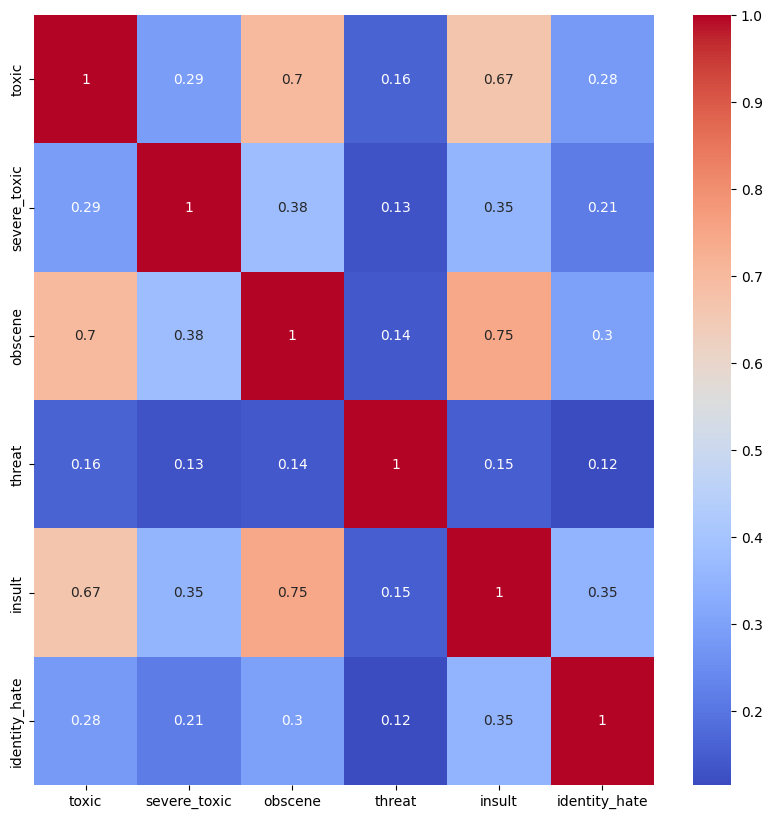

In [20]:

corr = df[CATEGORIES].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

We can see that the correlation between the two types of annotations is not perfect, which can be useful for training models to detect toxic behavior in a more nuanced way.

In [21]:
df['comment_length'] = df['comment_text'].apply(len)
px.histogram(df, x='comment_length', title='Distribution of the comments length')

In [10]:
df[df['toxic'] == 1].head()

id                                       comment_text  \
140030  ed56f082116dcbd0  Grandma Terri Should Burn in Trash \nGrandma T...   
37601   646fd5967ab2c55d  what the fuck who deleted the spider loc and h...   
139386  ea07d5bdbdeb9253  "IF YOU DONT LIKE ME LEAVING NASTY MESSAGES AN...   
72660   c26924f41f892517       And last but not least, yes, he WAS a crook.   
146565  2e282a1078a46934  My Feelings Are Hurt!!!!!!!!!!!!!! YOU Should ...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  \
140030      1             0        0       0       0              0   
37601       1             0        1       0       1              0   
139386      1             0        1       0       1              0   
72660       1             0        0       0       0              0   
146565      1             0        0       0       0              0   

        comment_length  
140030             111  
37601              127  
139386             369  
72660               44  
146565             173

In [22]:
category_counts = df_train[CATEGORIES].sum().reset_index()
category_counts.columns = ['Category', 'Count']

category_counts


px.pie(category_counts, names='Category', values='Count', title='Distribution of the categories', width=1000, height=1000)


With the repartition of the categories, we can see that the dataset is imbalanced, which can be a challenge for training models that are able to detect all types of toxic behavior effectively. In particular, the five categories which are represented less than 0.5% of the time are likely to be more challenging to detect.
The model will likely be biased because 6 out of the 11 categories represent 99% of the dataset.

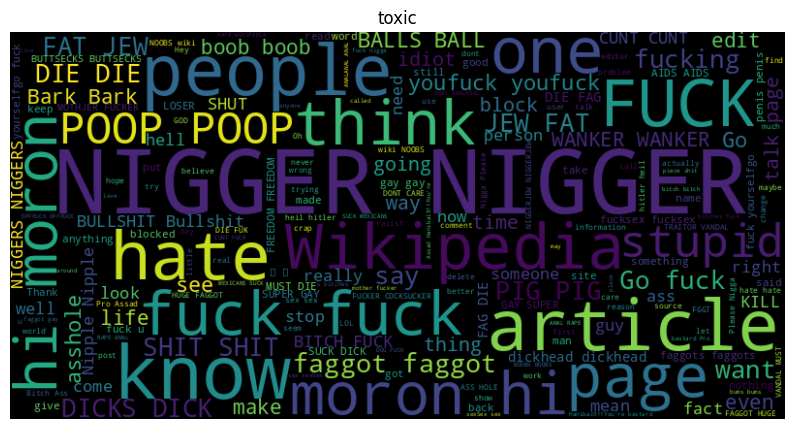

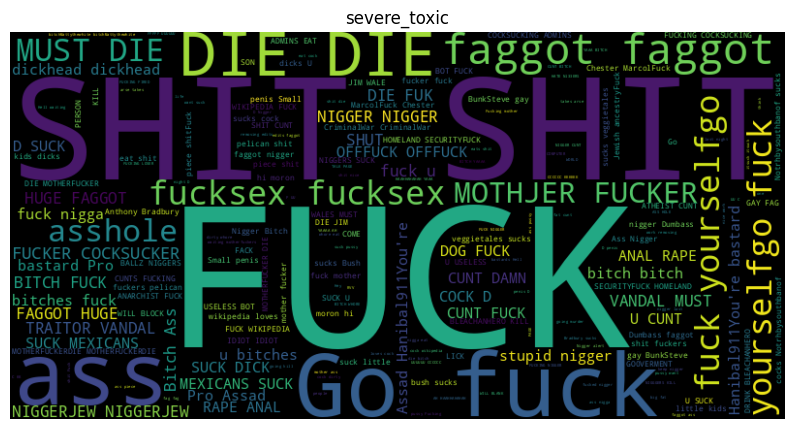

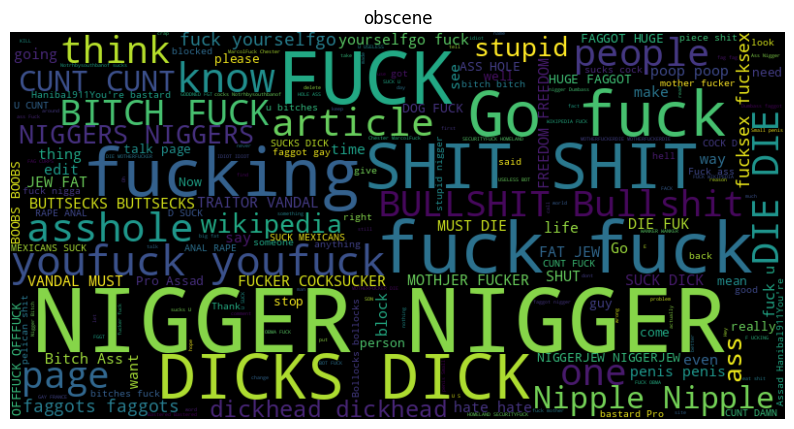

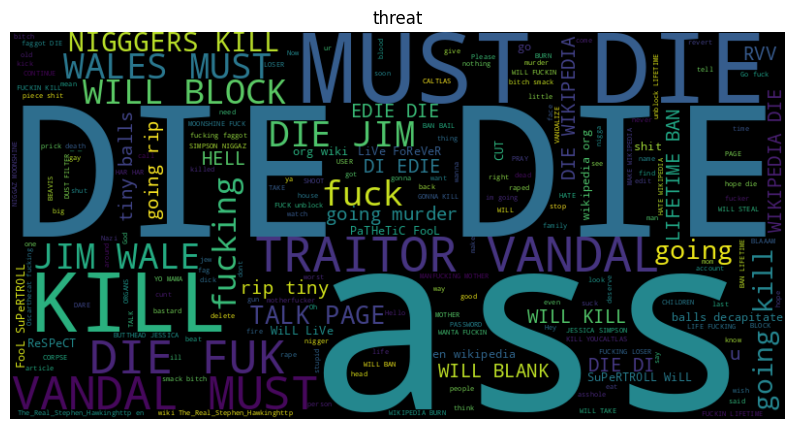

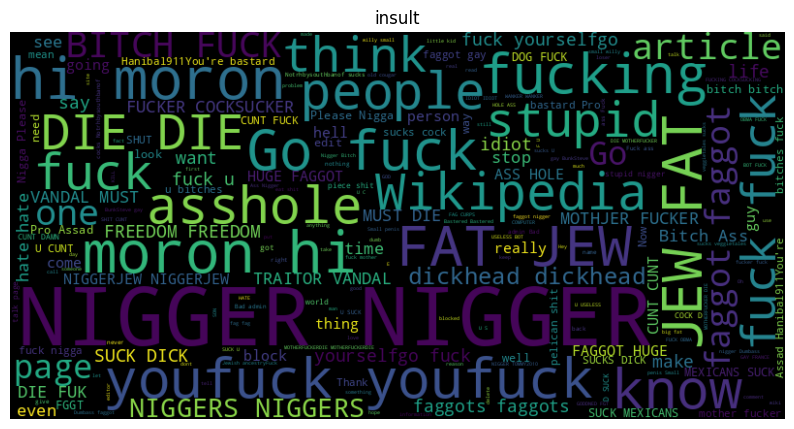

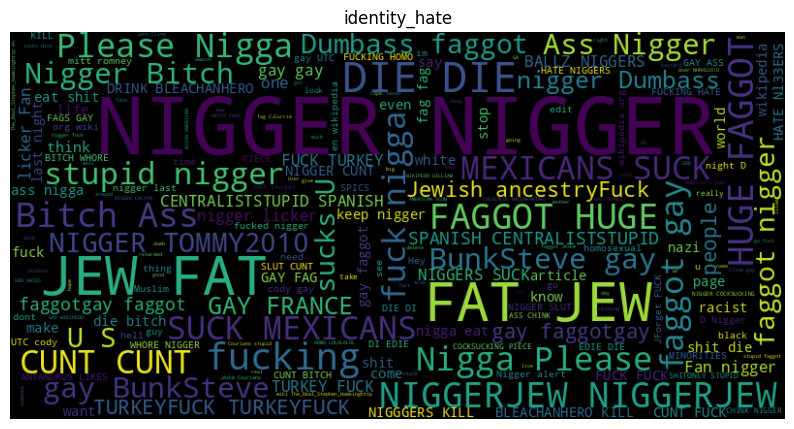

In [26]:
x

We can see that the toxic messages do not contains only swear words, but also some messages that are not toxic at all. This can be useful for training models that are able to detect toxic behavior in a more nuanced way.